<a href="https://colab.research.google.com/github/kumarmohit0911/Breast_cancer_detector_model/blob/main/Breast_cancer_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import json, os

kaggle_creds = {
    "username": "kumarmohit0911",
    "key": "KGAT_70d781b0a7eed54b863a6bcb5ab50e9c"
}

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_creds, f)

os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("kaggle.json created successfully")


kaggle.json created successfully


In [5]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.09G/3.10G [00:58<00:00, 179MB/s]
100% 3.10G/3.10G [01:01<00:00, 54.4MB/s]


In [11]:
!unzip -q breast-histopathology-images.zip

replace 10253/0/10253_idx5_x1001_y1001_class0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace 10253/0/10253_idx5_x1001_y1051_class0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [18]:
import os
DATA_DIR = "IDC_regular_ps50_idx5"

image_path = []
labels = []

for patient_id in os.listdir(DATA_DIR):
  patient_path = os.path.join(DATA_DIR,patient_id)
  if not os.path.isdir(patient_path):
    continue

  for label in ["0","1"]:
    label_path = os.path.join(patient_path,label)
    if not os.path.isdir(label_path):
      continue

    for image_name in os.listdir(label_path):
      image_path.append(os.path.join(label_path,image_name))
      labels.append(int(label))


In [19]:
image_path[1]

'IDC_regular_ps50_idx5/12879/0/12879_idx5_x2101_y51_class0.png'

In [20]:
labels[1]

0

In [26]:
from PIL import Image
import matplotlib.pyplot as plt


img_path = "IDC_regular_ps50_idx5/12879/0/12879_idx5_x2101_y51_class0.png"

img = Image.open(img_path).convert("RGB")

print(type(img))      # PIL.Image.Image
print(img.size)       # (width, height)


None
<class 'PIL.Image.Image'>
(50, 50)


AxesImage(shape=(50, 50, 3))


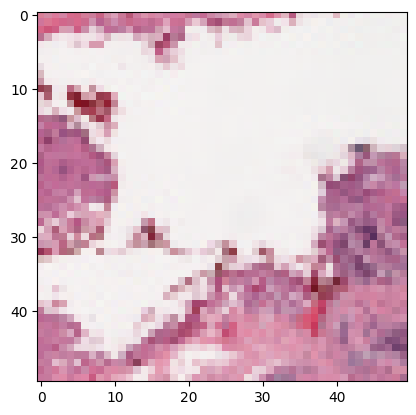

In [28]:
print(plt.imshow(img))

In [54]:
from torch.utils.data import Dataset
from PIL import Image
class CustomDataset(Dataset):
  def __init__(self,image_path,labels):
    #convert to pytorch tensors
    self.image_path = image_path
    self.labels = labels

  def __len__(self):
    return len(self.image_path)

  def __getitem__(self,index):
        # 1. Load image from disk
        image = Image.open(self.image_path[index]).convert("RGB")

        # 2. Get label
        label = self.labels[index]



        return image, label

In [55]:
dataset = CustomDataset(image_path,labels)

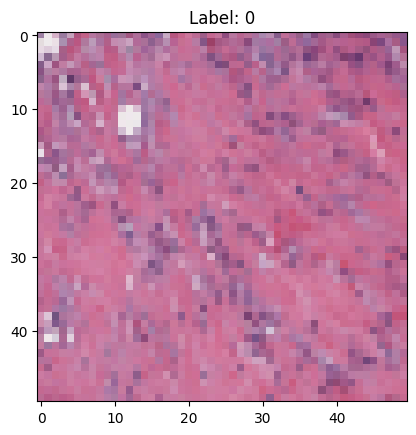

In [96]:
image, label = dataset[100]
plt.title(f"Label: {label}")
plt.imshow(image)


In [97]:
len(dataset)

277524

In [87]:
from torch.utils.data import random_split
import random
random.seed(42)
random.shuffle(image_path)

dataset_size = len(full_dataset)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

train_dataset,test_dataset = random_split(dataset,[train_size,test_size])

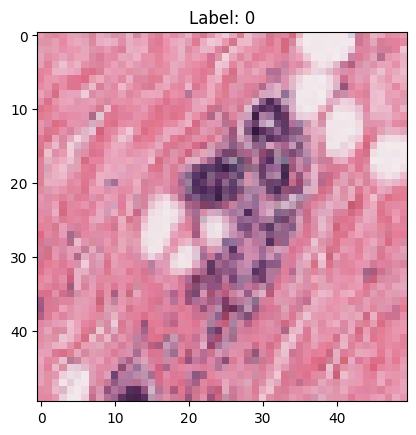

In [98]:
image,labels = train_dataset[10]
plt.title(f"Label: {label}")
plt.imshow(image)